In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 217 GB / percent used: 13.8 %


# Check the surface variables first
In particular the snow cover

In [2]:
path = '/data/mlalande/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-def/SRF/Output/MO'

In [3]:
!ls {path}

clim-relief-def_19800101_19801230_1M_sechiba_history.nc
clim-relief-def_19810101_19811230_1M_sechiba_history.nc
clim-relief-def_19820101_19821230_1M_sechiba_history.nc
clim-relief-def_19830101_19831230_1M_sechiba_history.nc
clim-relief-def_19840101_19841230_1M_sechiba_history.nc
clim-relief-def_19850101_19851230_1M_sechiba_history.nc
clim-relief-def_19860101_19861230_1M_sechiba_history.nc
clim-relief-def_19870101_19871230_1M_sechiba_history.nc
clim-relief-def_19880101_19881230_1M_sechiba_history.nc
clim-relief-def_19890101_19891230_1M_sechiba_history.nc
clim-relief-def_19900101_19901230_1M_sechiba_history.nc


In [4]:
!ncdump -h {path}/clim-relief-def_19800101_19801230_1M_sechiba_history.nc | grep snow | grep long_name

		snowlev:long_name = "Snow levels" ;
		snowf:long_name = "Snowfall rate" ;
		snow:long_name = "Snow mass" ;
		snowage:long_name = "Snow age on vegetated and bare soil area" ;
		snownobio:long_name = "Snow on nobio area" ;
		snownobioage:long_name = "Snow age on nobio area" ;
		snowmelt:long_name = "Snow melt" ;
		tot_melt:long_name = "Total melt from ice and snow" ;
		snowmelt_from_maxmass:long_name = "Snow melt above threshold" ;
		soilcap:long_name = "Surface heat capacity considering snow and soil surface" ;
		pkappa_snow:long_name = "Snow thermal conductivity" ;
		pcapa_snow:long_name = "Snow heat capacity" ;
		snowtemp:long_name = "snow temperature" ;
		snowtemp_weighted:long_name = "mean snow temperature weighted by snow density" ;
		snowliq:long_name = "Snow liquid content where land" ;
		snowdz:long_name = "Snow layer thickness in the snow fraction" ;
		snowrho:long_name = "Snow denisty" ;
		snowheat:long_name = "Snow heat content" ;
		snowgrain:long_name = "Snow grain size" ;

# Get the snow cover
Attention calendrier 360d

In [5]:
latlim=(10,50)
lonlim=(60,110)

var_label = 'Snow cover extent [%]'
cmap='viridis'
levels=plot.arange(0,100,10)

In [94]:
ds = xr.open_mfdataset(path+'/*.nc', combine='by_coords')

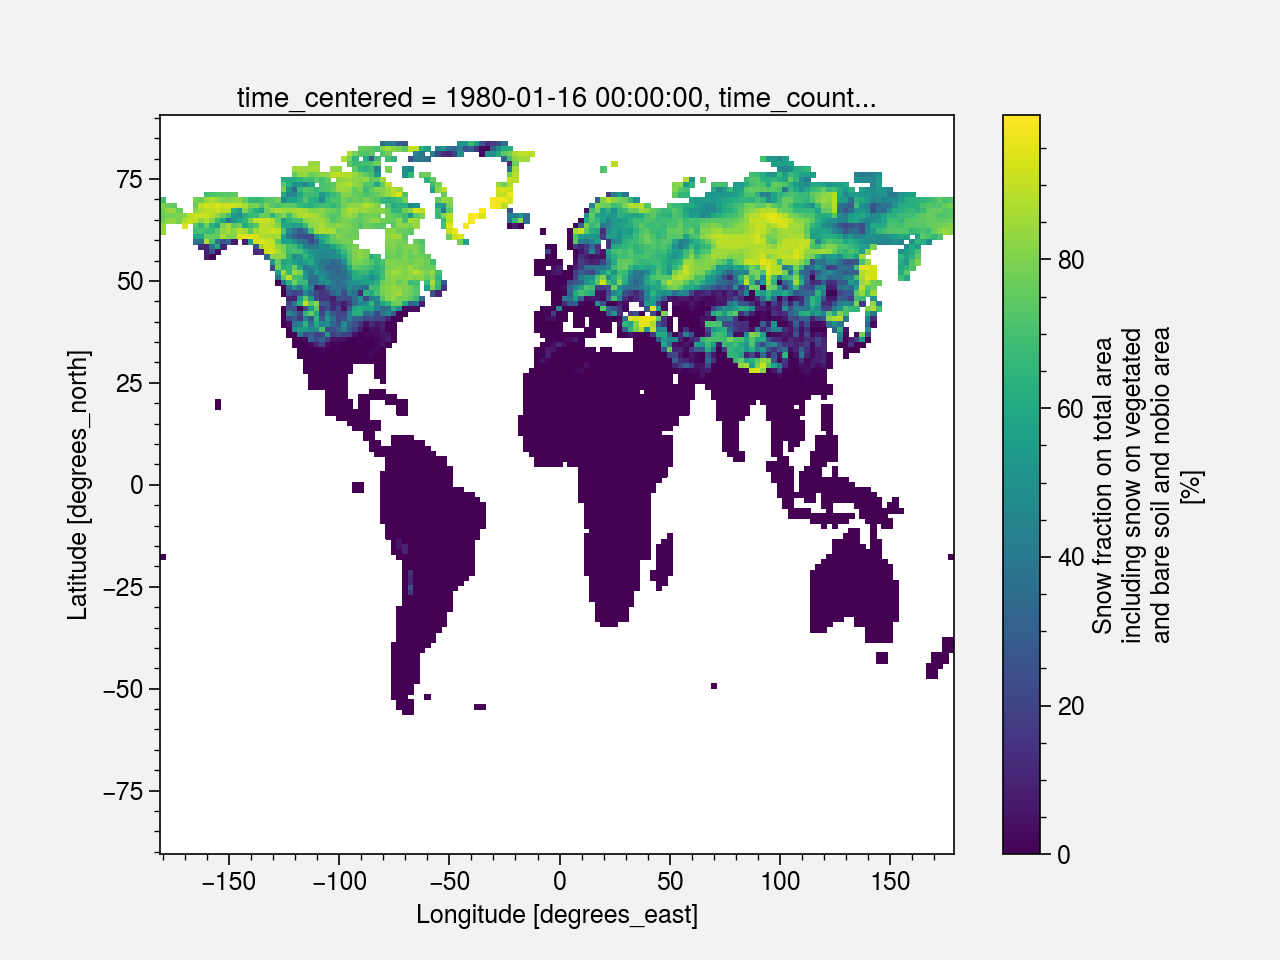

In [95]:
ds.frac_snow[0].plot()

In [97]:
ds_HMA = ds.sel(lat=slice(50,10), lon=slice(60,110))

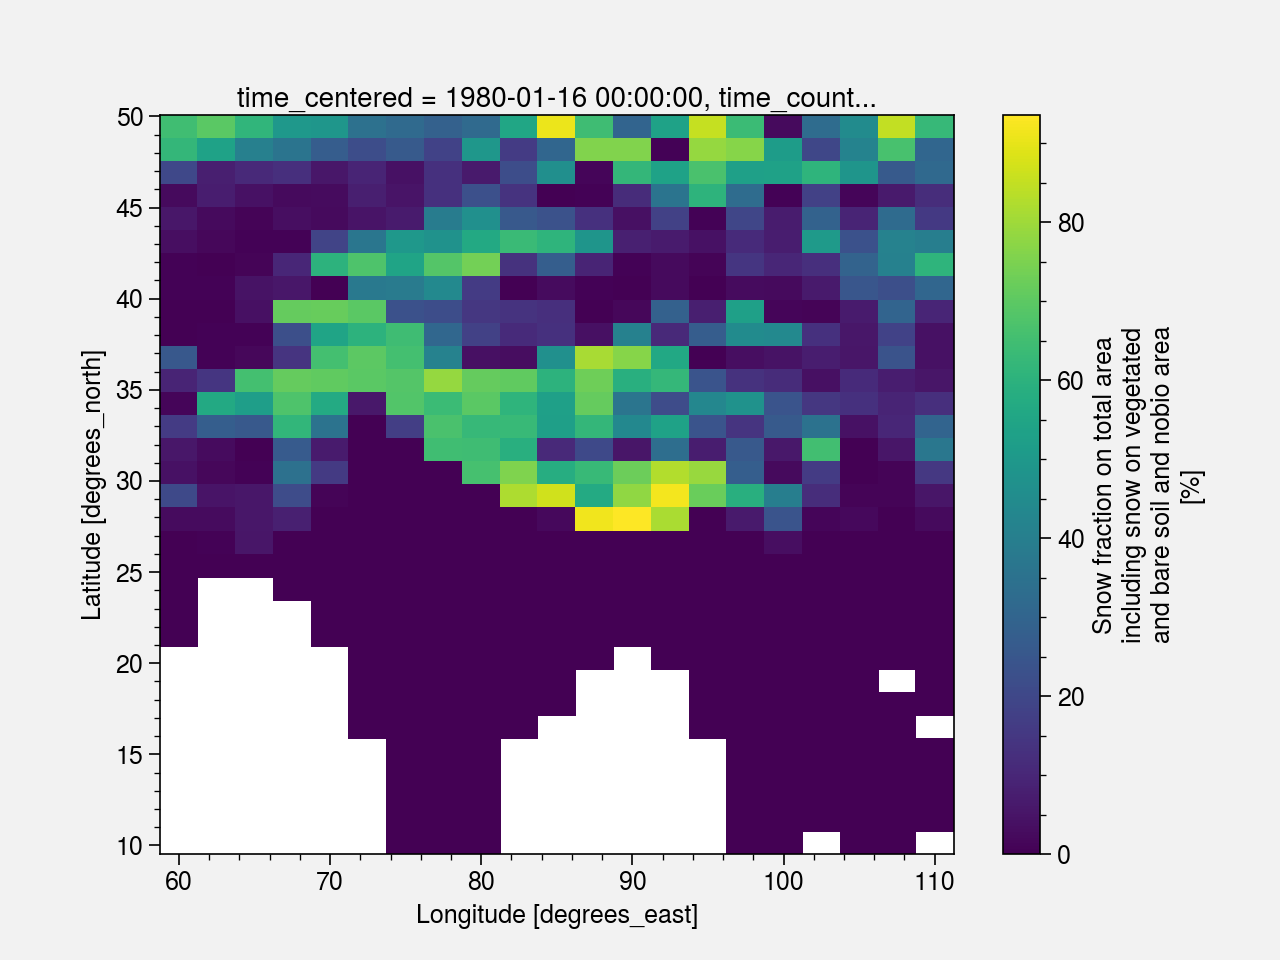

In [98]:
ds_HMA.frac_snow[0].plot()

# Let's target some 100% pixels
http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/Snow%20cover.ipynb

In [99]:
ds_HMA.frac_snow

<xarray.DataArray 'frac_snow' (time_counter: 132, lat: 32, lon: 21)>
dask.array<getitem, shape=(132, 32, 21), dtype=float32, chunksize=(12, 32, 21), chunktype=numpy.ndarray>
Coordinates:
  * lat            (lat) float32 49.43662 48.169014 ... 11.408451 10.140845
  * lon            (lon) float32 60.0 62.5 65.0 67.5 ... 102.5 105.0 107.5 110.0
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1990-12-16 00:00:00
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

## Choose pixels

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


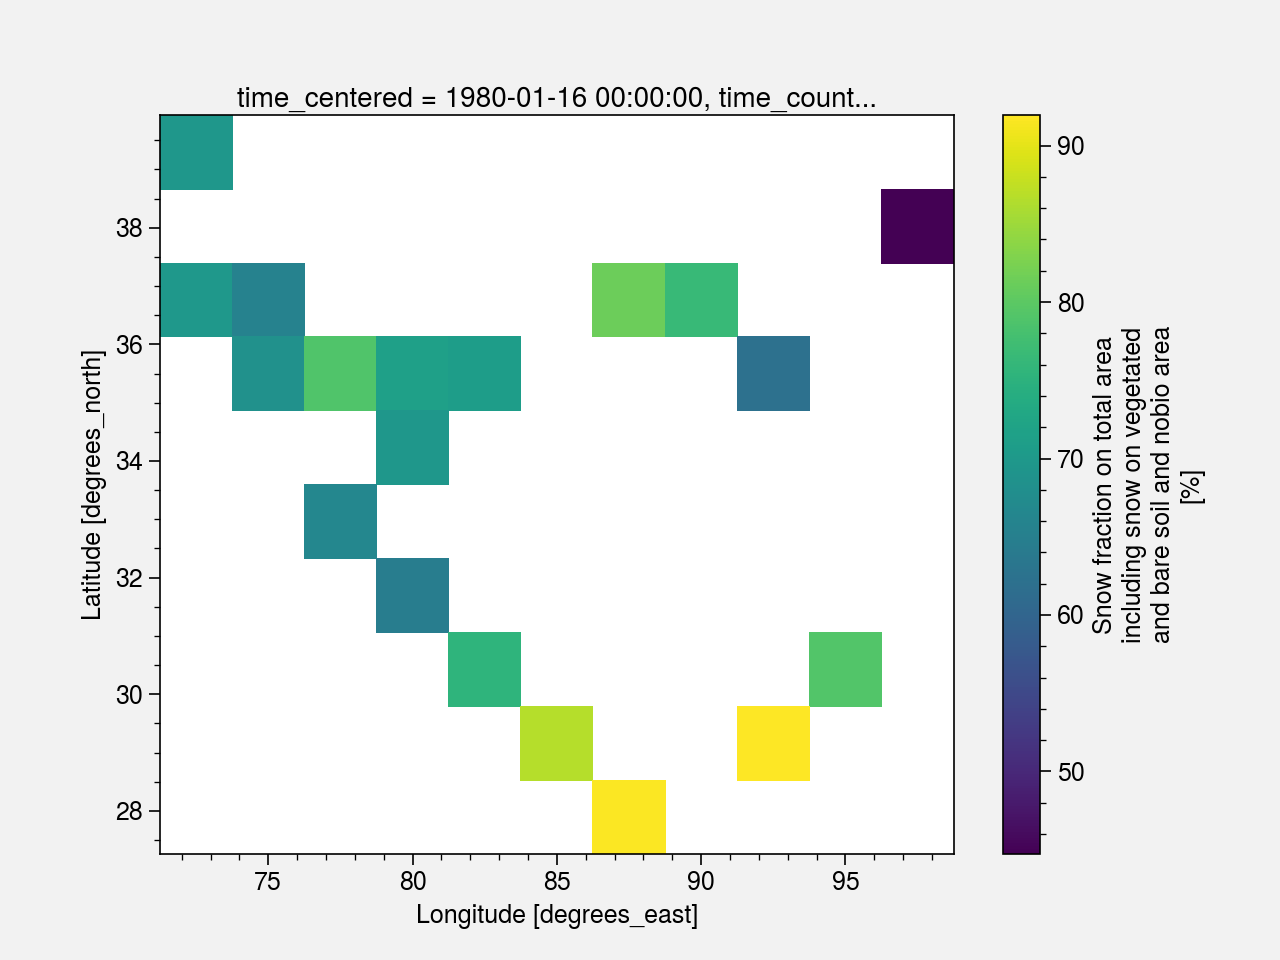

In [100]:
ds_HMA.frac_snow[0].where(ds_HMA.frac_snow.sel(time_counter=slice('1985', '1990')).mean('time_counter') == 100, drop=True).plot()

In [196]:
ds_HMA.frac_snow[0].where(ds_HMA.frac_snow.sel(time_counter=slice('1985', '1990')).mean('time_counter') == 100, drop=True)[-2, 4]

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'frac_snow' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    lat            float32 29.15493
    lon            float32 82.5
    time_centered  int64 dask.array<chunksize=(), meta=np.ndarray>
    time_counter   object 1980-01-16 00:00:00
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

## Plots them

In [200]:
# 3 100% points Karakoram, north-est, Himalaya
lat_100 = [35.492958, 29.15493, 29.15493, 38.028168]
lon_100 = [77.5, 82.5, 85.0, 97.5]
dx = 2.5
dy = 1.2676

In [201]:
def select_pixels(axs, lat, lon, dx, dy):
    for ax in axs:
        for i in range(len(lat)):
            ax.add_patch(
                Rectangle(
                    xy=[lon[i]-dx/2, lat[i]-dy/2], width=dx, height=dy, 
                    fill=False, color='C'+str(i), lw=4
                )
            )

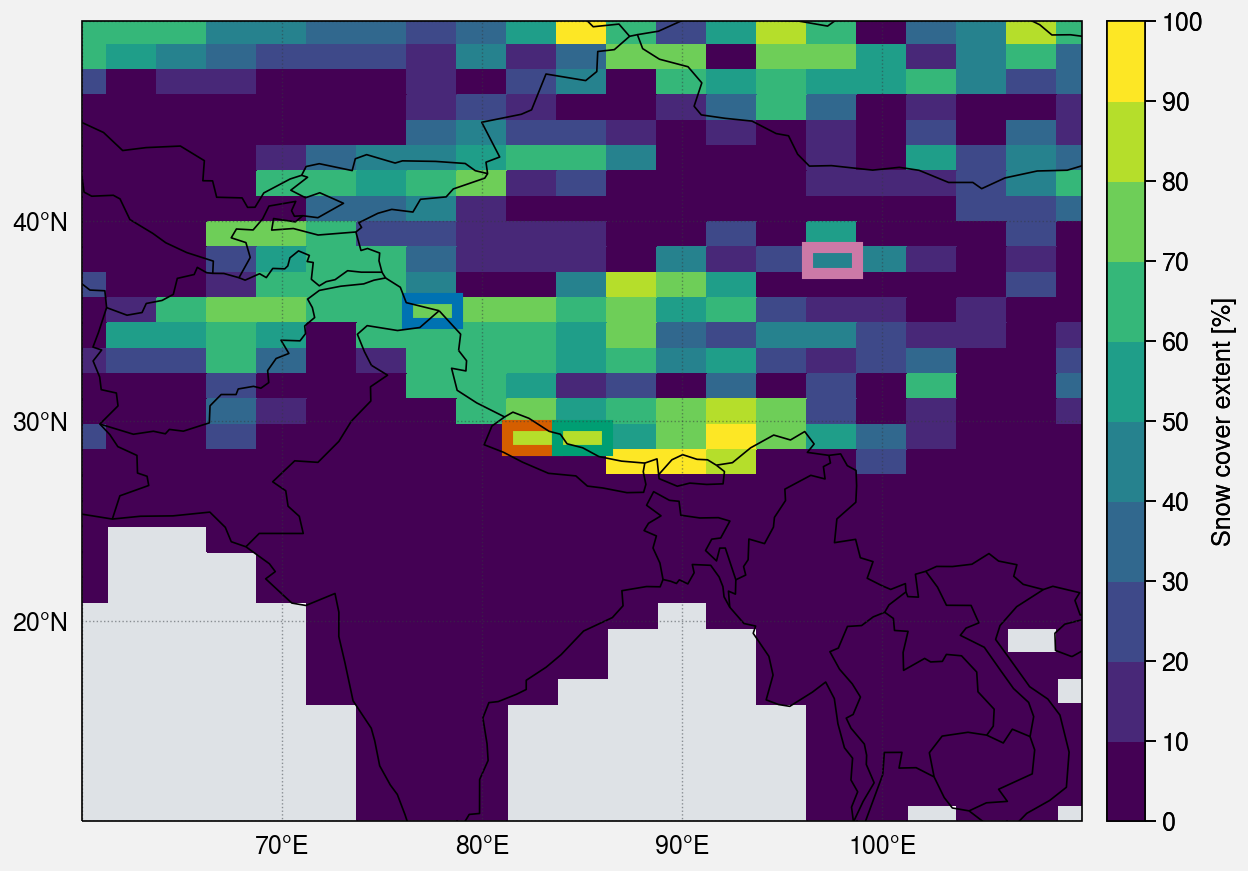

In [202]:
f, axs = plot.subplots(ncols=1, nrows=1, proj='cyl', axwidth=5)

m = axs[0].pcolormesh(ds_HMA.frac_snow[0], cmap=cmap, levels=levels)
axs[0].format(title='')
f.colorbar(m, label=var_label)

select_pixels(axs, lat_100, lon_100, dx, dy)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
#     suptitle="",
    lonlines=10, latlines=10, abc=False, latlim=latlim, lonlim=lonlim
)

# f.save('.png')
# f.save('.pdf')

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


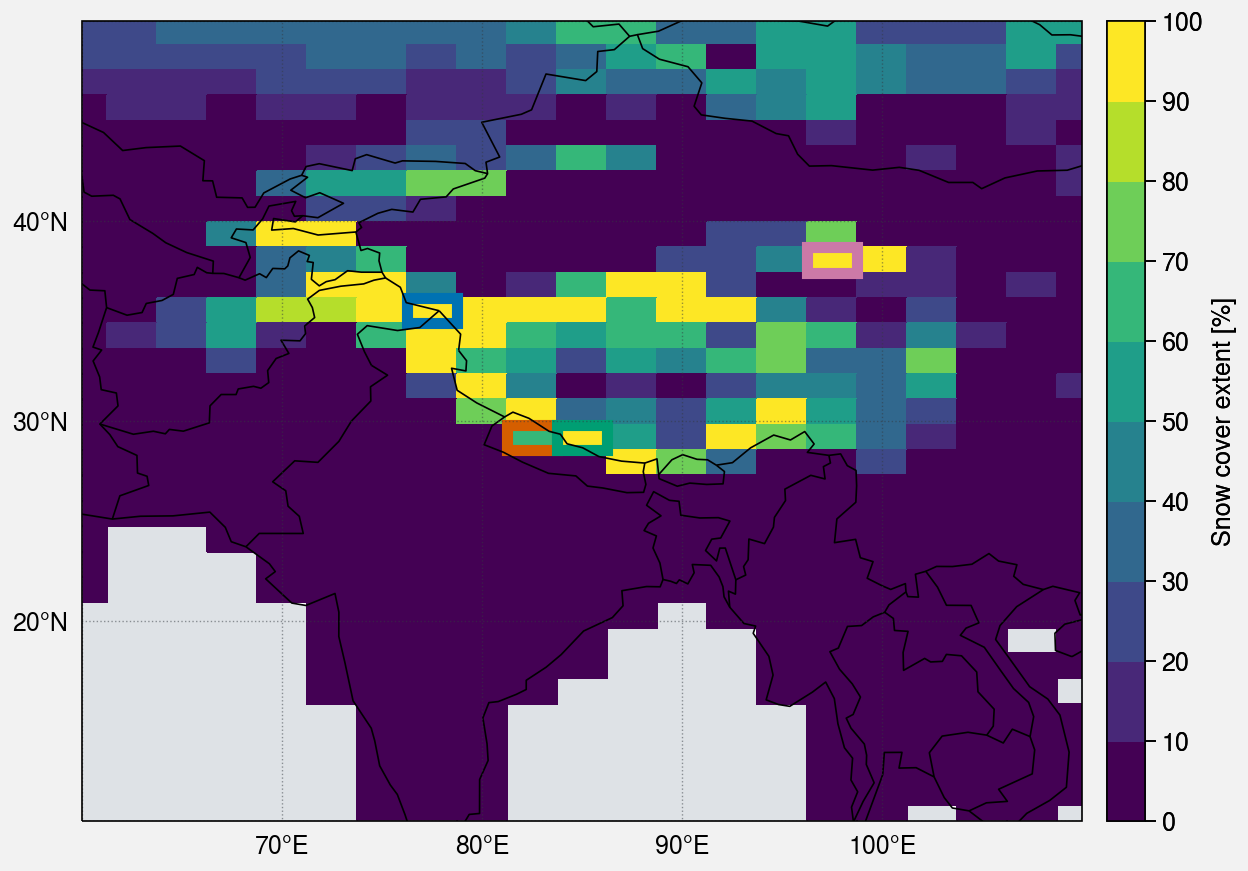

In [203]:
f, axs = plot.subplots(ncols=1, nrows=1, proj='cyl', axwidth=5)

m = axs[0].pcolormesh(clim_end, cmap=cmap, levels=levels)
axs[0].format(title='')
f.colorbar(m, label=var_label)

select_pixels(axs, lat_100, lon_100, dx, dy)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
#     suptitle="",
    lonlines=10, latlines=10, abc=False, latlim=latlim, lonlim=lonlim
)

## Let's plot the time series of these pixels

In [4]:
!ncdump -h {path}/clim-relief-def_19800101_19801230_1M_sechiba_history.nc | grep snow | grep long_name

		snowlev:long_name = "Snow levels" ;
		snowf:long_name = "Snowfall rate" ;
		snow:long_name = "Snow mass" ;
		snowage:long_name = "Snow age on vegetated and bare soil area" ;
		snownobio:long_name = "Snow on nobio area" ;
		snownobioage:long_name = "Snow age on nobio area" ;
		snowmelt:long_name = "Snow melt" ;
		tot_melt:long_name = "Total melt from ice and snow" ;
		snowmelt_from_maxmass:long_name = "Snow melt above threshold" ;
		soilcap:long_name = "Surface heat capacity considering snow and soil surface" ;
		pkappa_snow:long_name = "Snow thermal conductivity" ;
		pcapa_snow:long_name = "Snow heat capacity" ;
		snowtemp:long_name = "snow temperature" ;
		snowtemp_weighted:long_name = "mean snow temperature weighted by snow density" ;
		snowliq:long_name = "Snow liquid content where land" ;
		snowdz:long_name = "Snow layer thickness in the snow fraction" ;
		snowrho:long_name = "Snow denisty" ;
		snowheat:long_name = "Snow heat content" ;
		snowgrain:long_name = "Snow grain size" ;

In [178]:
ds_HMA

<xarray.Dataset>
Dimensions:                (albtyp: 2, axis_nbounds: 2, lat: 32, lon: 21, nlut: 4, nobio: 1, snowlev: 3, soiltyp: 3, solay: 11, solth: 18, time_counter: 132, veget: 15)
Coordinates:
  * albtyp                 (albtyp) float32 1.0 2.0
  * nlut                   (nlut) float32 1.0 2.0 3.0 4.0
  * solth                  (solth) float32 0.00048875855 ... 65.56207
  * veget                  (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * nobio                  (nobio) float32 1.0
  * soiltyp                (soiltyp) float32 1.0 2.0 3.0
  * snowlev                (snowlev) float32 1.0 2.0 3.0
  * lat                    (lat) float32 49.43662 48.169014 ... 10.140845
  * solay                  (solay) float32 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * lon                    (lon) float32 60.0 62.5 65.0 ... 105.0 107.5 110.0
    time_centered          (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter           (time_counter) object 1980-01-16 00:00:00 ... 1990-12-16 00:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds    (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    Areas                  (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    Contfrac               (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    evap                   (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    coastalflow            (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    riverflow              (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    coastalflow_cpl        (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    riverflow_cpl          (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    temp_sol               (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    mrsow                  (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    ksat                   (time_counter, solay, lat, lon) float32 dask.array<chunksize=(12, 11, 32, 21), meta=np.ndarray>
    rain                   (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    snowf                  (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    netrad                 (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    lai                    (time_counter, veget, lat, lon) float32 dask.array<chunksize=(12, 15, 32, 21), meta=np.ndarray>
    reinf_slope            (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    soilindex              (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    basinmap               (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    nbrivers               (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    npp                    (time_counter, veget, lat, lon) float32 dask.array<chunksize=(12, 15, 32, 21), meta=np.ndarray>
    WaterTableD            (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    TWS                    (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    subli                  (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    runoff                 (time_counter, lat, lon) float32 dask.array<chunksize=(12, 32, 21), meta=np.ndarray>
    drainage               (time_counter, lat, lon) float32 dask.array<c

In [191]:
ds_HMA.DelSWE_daily

<xarray.DataArray 'DelSWE_daily' (time_counter: 132, lat: 32, lon: 21)>
dask.array<getitem, shape=(132, 32, 21), dtype=float32, chunksize=(12, 32, 21), chunktype=numpy.ndarray>
Coordinates:
  * lat            (lat) float32 49.43662 48.169014 ... 11.408451 10.140845
  * lon            (lon) float32 60.0 62.5 65.0 67.5 ... 102.5 105.0 107.5 110.0
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1990-12-16 00:00:00
Attributes:
    long_name:           Change in Snow Water Equivalent accumulated over eac...
    units:               kg/m^2/d
    online_operation:    average
    interval_operation:  1 d
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1 d)

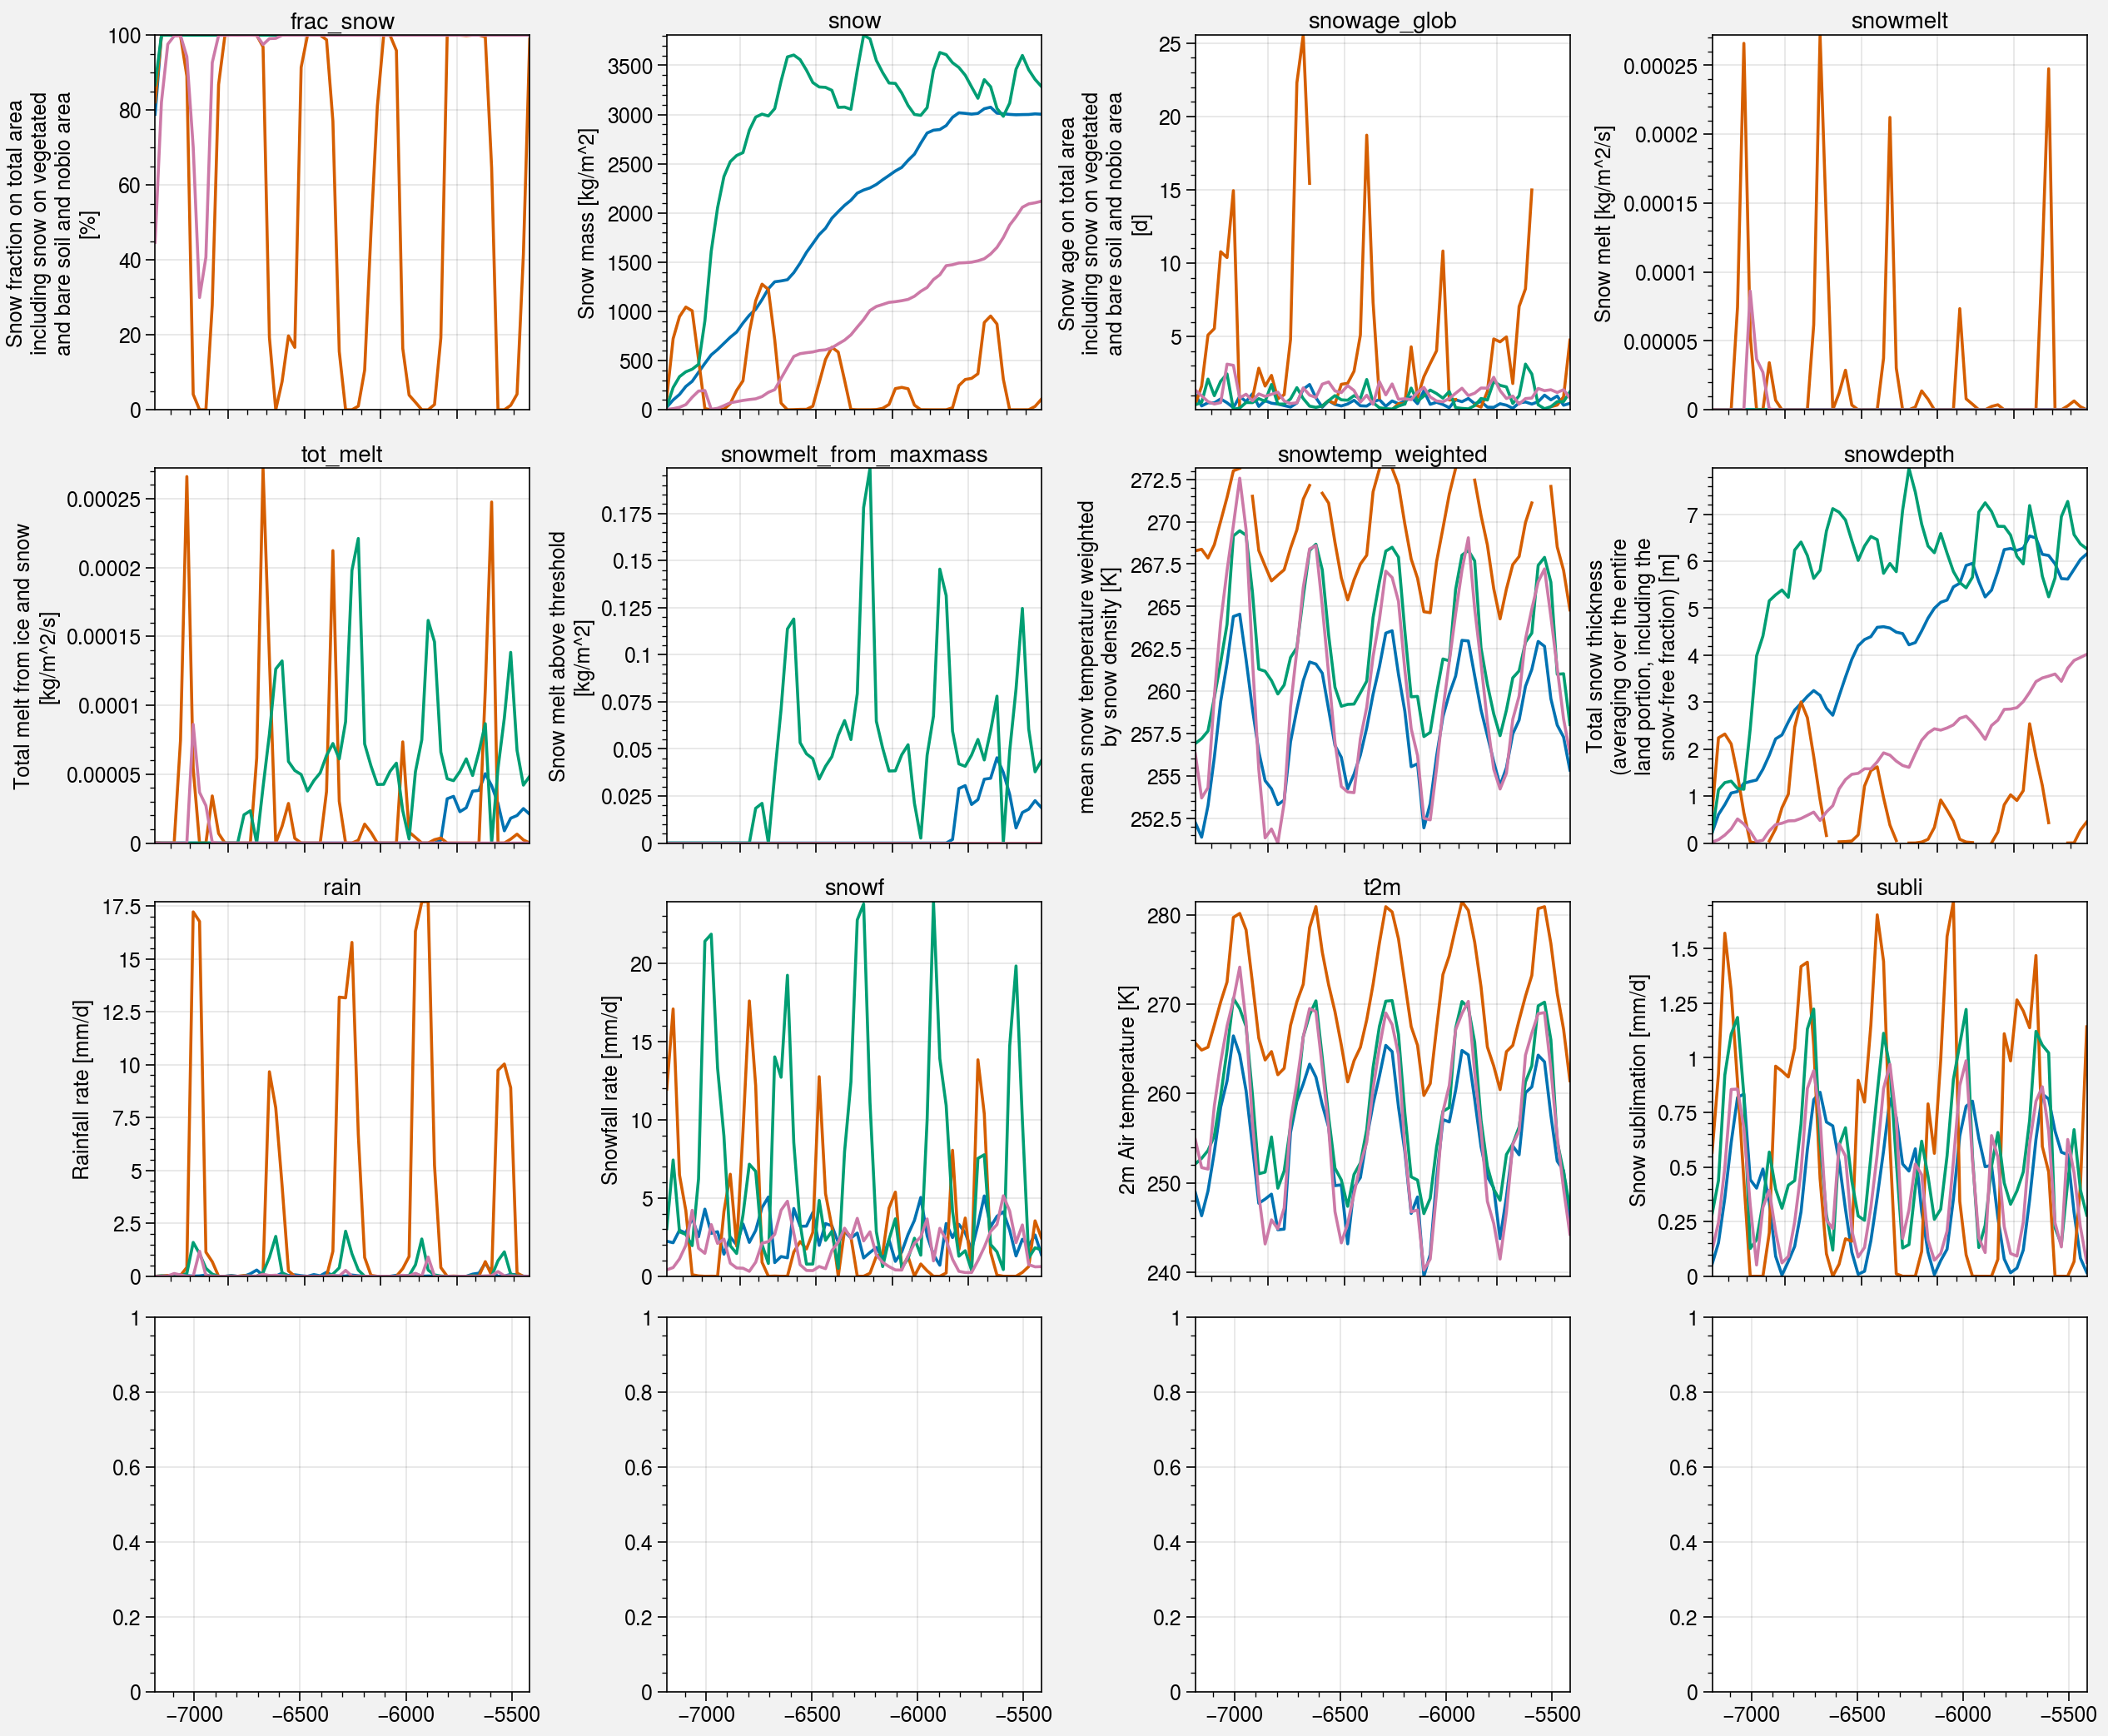

In [205]:
n = len(lat_100)
variables = [
    'frac_snow','snow', 'snowage_glob', 'snowmelt', 'tot_melt', 'snowmelt_from_maxmass',
    'snowtemp_weighted', 'snowdepth', 'rain', 'snowf',
    't2m', 'subli'
]

f, axs = plot.subplots(ncols=4, nrows=len(variables)//4+1, sharey=0)

hs = []
for k, variable in enumerate(variables):
    for i in range(n):
        ds_HMA[variable].sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[k], label='test')
        axs[k].format(title=variable)

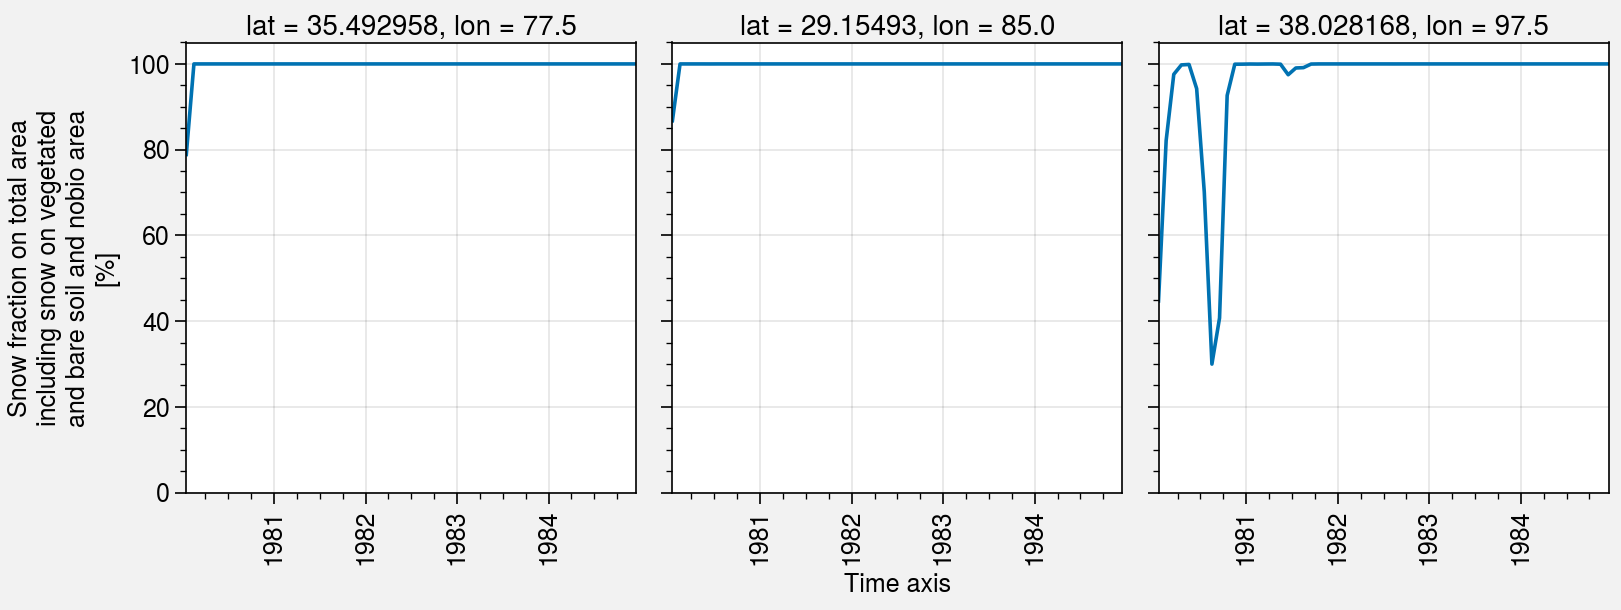

In [110]:
n = len(lat_100)

f, axs = plot.subplots(ncols=n, nrows=1)

for i in range(n):
    ds_HMA.frac_snow.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])
    
axs.format(ylim=(0,105))

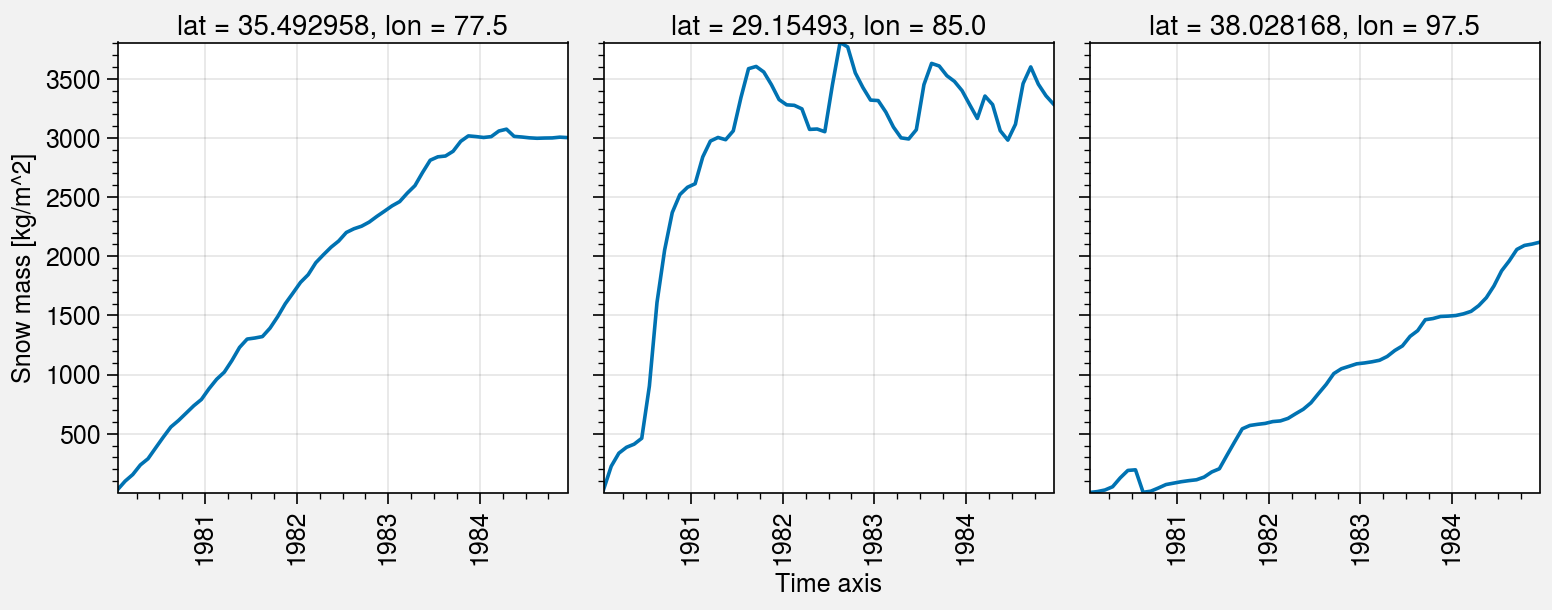

In [121]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.snow.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])

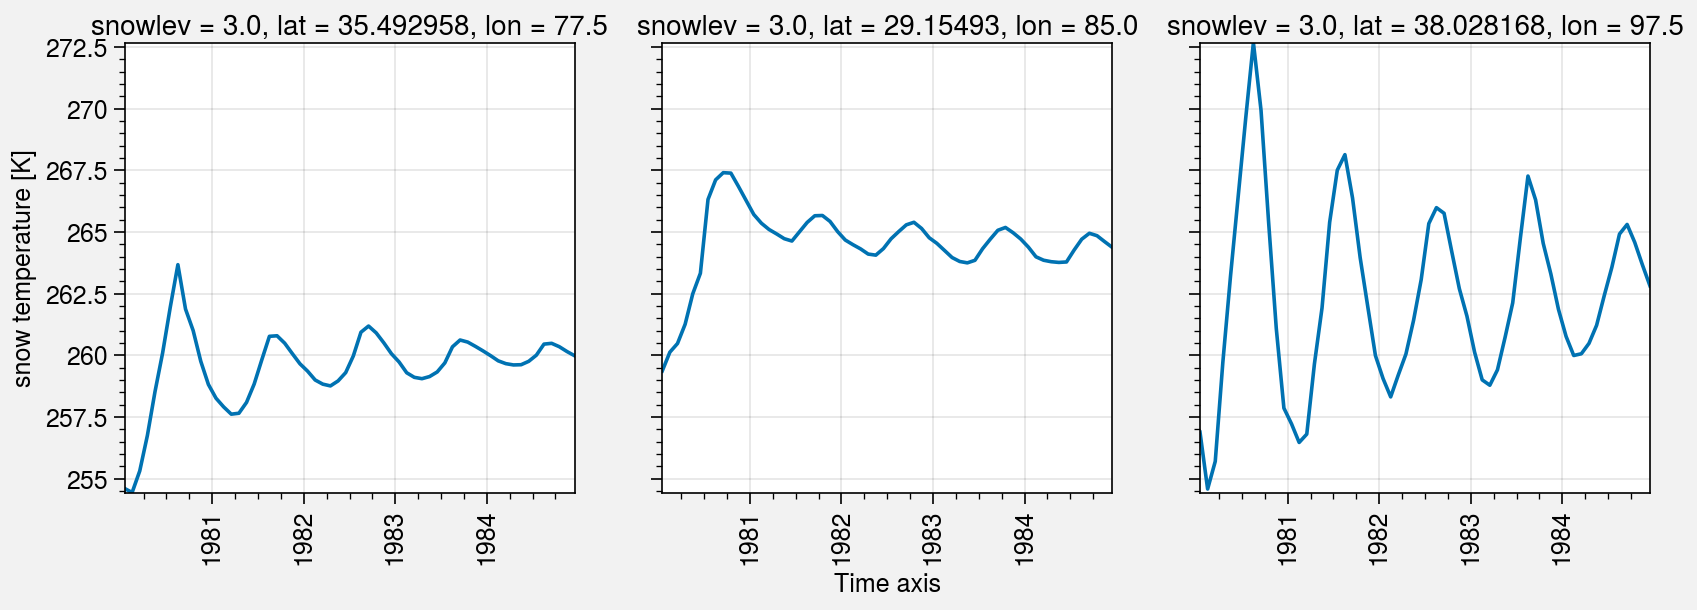

In [169]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.snowtemp.sel(snowlev=3.0, lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])

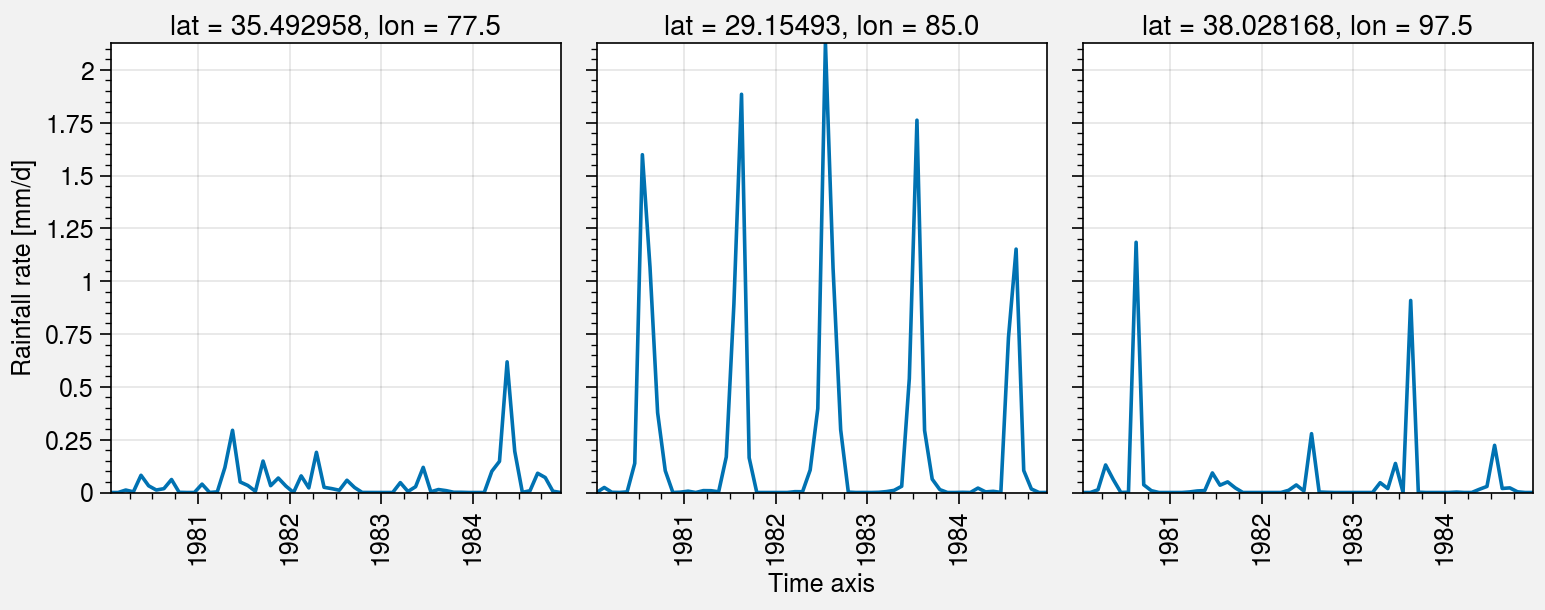

In [125]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.rain.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])

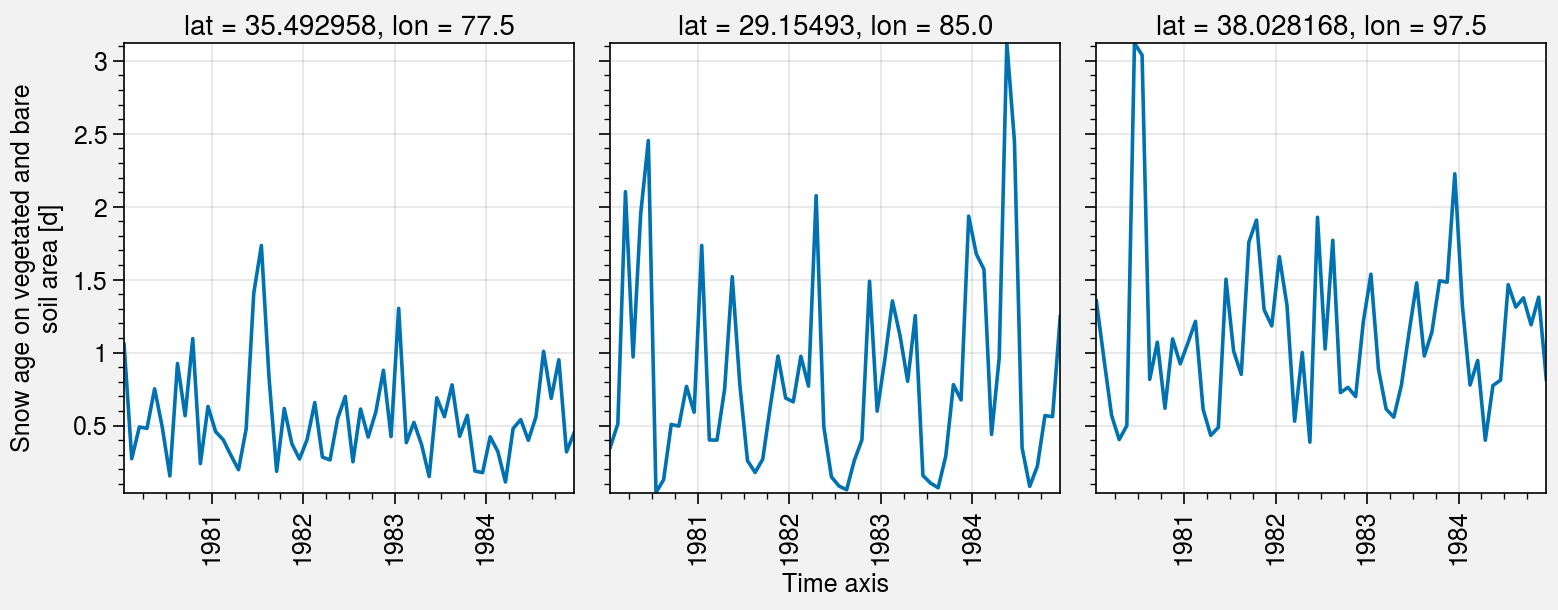

In [126]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.snowage.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])

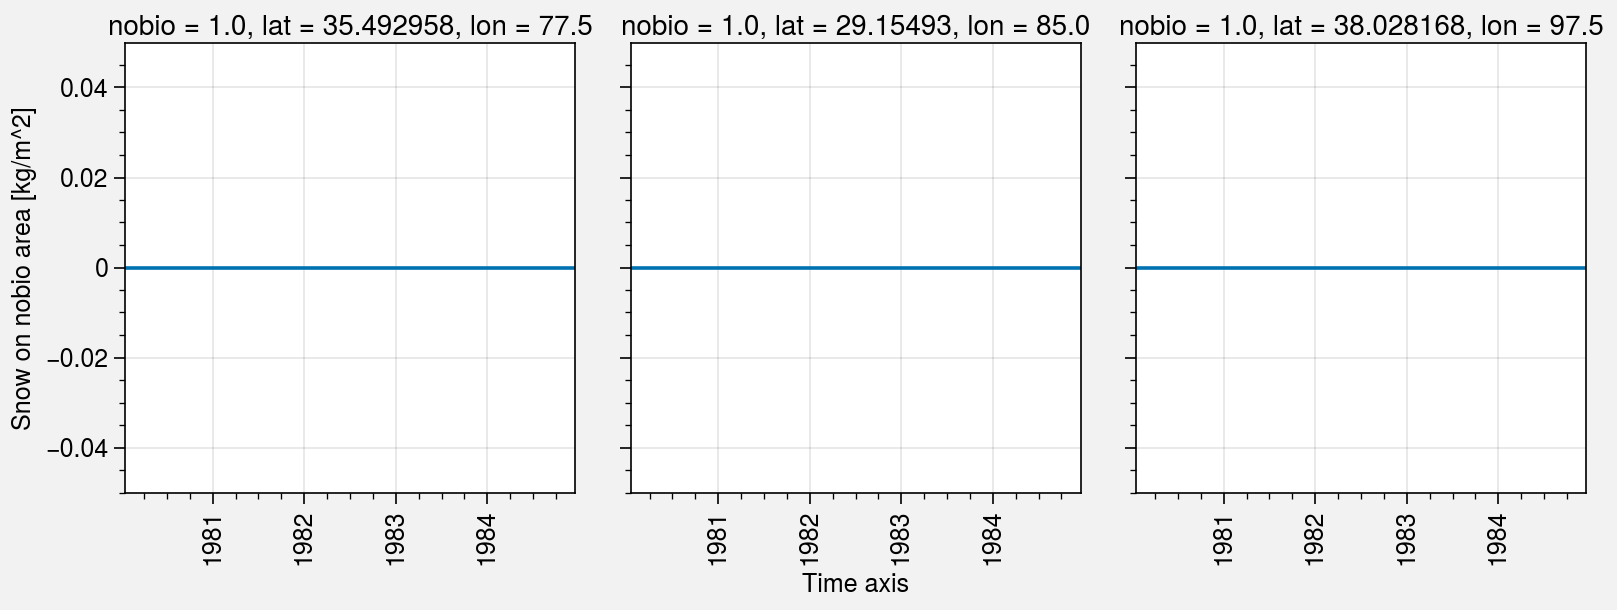

In [128]:
f, axs = plot.subplots(ncols=n, nrows=1)
for i in range(n):
    ds_HMA.snownobio.sel(lat=lat_100[i], lon=lon_100[i], time_counter=slice('1980', '1984')).plot(ax=axs[i])